<a href="https://colab.research.google.com/github/MAL3X-01/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module3-dimensionality-reduction/High%20Dimensional%20Data%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

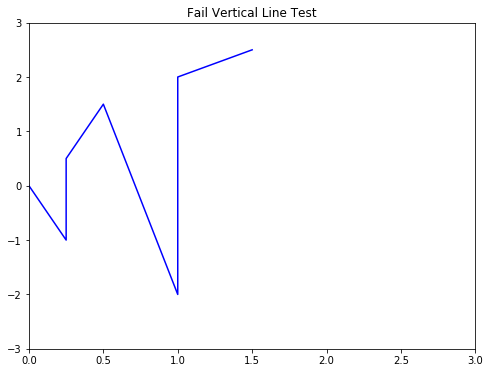

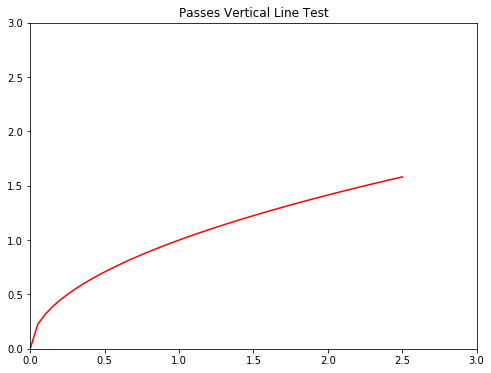

In [2]:
fig, ax = plt.subplots( figsize=(8,6), facecolor='w', )
plt.figure(figsize=(8, 6), facecolor='w')

a = [0,.25,.25,.5,1,1,1.5]
b = [0,-1,.5,1.5,-2,2,2.5]

ax.plot(a,b, color='blue')

ax.set_xlim(0,3)
ax.set_ylim(-3,3)

ax.set_title('Fail Vertical Line Test')

x = np.linspace(0, 2.5)
y = x**.5
plt.plot(x, y, color='red')

plt.xlim(0,3)
plt.ylim(0,3)
plt.title('Passes Vertical Line Test')
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

A function can only have one output. So for every x point there should only by one y output.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 3 - 5 are functions becasue they only have one unique y output.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

The dimensionality of m input is 3 and output is 3.
The dimensionality of n input is 4 and output is 2.

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Yes, 

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

T(V1)=1V;   1 representing lambda;
egienvalue is associated with eigenvector in transformation form. above (lambda)
eigenvector is just a vector that is getting scaled up by its eigenvalue(V)

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

It will tend to overfit a model and its will be hard to comprehend high dimensional space. It will be hard to explore the data and visualization. The workload could be too much to handle.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

You should 5 times the observation as you have parameters in your model

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [3]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
dfx = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
dfy = df[['species']]

dfx.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
dfy.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [6]:
dfx.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [7]:
dfx['sepal_length'] = dfx['sepal_length'].apply(lambda x: x-dfx['sepal_length'].mean())
dfx['sepal_width'] = dfx['sepal_width'].apply(lambda x: x-dfx['sepal_width'].mean())
dfx['petal_length'] = dfx['petal_length'].apply(lambda x: x-dfx['petal_length'].mean())
dfx['petal_width'] = dfx['petal_width'].apply(lambda x: x-dfx['petal_width'].mean())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [8]:
dfx.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667
3,-1.243333,0.046,-2.258667,-0.998667
4,-0.843333,0.546,-2.358667,-0.998667


In [9]:
dfx['sepal_length'] = dfx['sepal_length'].apply(lambda x: x/dfx['sepal_length'].std())
dfx['sepal_width'] = dfx['sepal_width'].apply(lambda x: x/dfx['sepal_width'].std())
dfx['petal_length'] = dfx['petal_length'].apply(lambda x: x/dfx['petal_length'].std())
dfx['petal_width'] = dfx['petal_width'].apply(lambda x: x/dfx['petal_width'].std())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [10]:
dfx.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593


In [11]:
xcov = dfx.cov()
xcov

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [12]:
eigenvalues, eigenvectors = np.linalg.eig(xcov)
#eigenvectors = eigenvectors[0:2]
print('Eigenvalues:\n', eigenvalues)
print('Eigenvectors:\n', eigenvectors)

Eigenvalues:
 [2.91081808 0.92122093 0.14735328 0.02060771]
Eigenvectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [13]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i)
    

Eigenvalues in descending order:
(2.910818083752054, array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105]))
(0.921220930707223, array([-0.37231836, -0.92555649, -0.02109478, -0.06541577]))
(0.1473532783050959, array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ]))
(0.020607707235625026, array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))


In [14]:
pca12 = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

print('pca12:\n', pca12)

pca12:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [24]:
PD = eigenvectors.T.dot(dfx.T)
print("\n Projected Data: \n", P.T)


 Projected Data: 
 [[-2.25698063e+00 -5.04015404e-01 -1.21536190e-01  2.29962838e-02]
 [-2.07945912e+00  6.53216394e-01 -2.26492063e-01  1.02863642e-01]
 [-2.36004408e+00  3.17413945e-01  5.13077379e-02  2.77323192e-02]
 [-2.29650366e+00  5.73446613e-01  9.85303586e-02 -6.60900544e-02]
 [-2.38080159e+00 -6.72514411e-01  2.13563034e-02 -3.72724209e-02]
 [-2.06362348e+00 -1.51347827e+00  3.05818064e-02  4.38408784e-03]
 [-2.43754534e+00 -7.43137171e-02  3.41055070e-01 -3.79693659e-02]
 [-2.22638327e+00 -2.46787172e-01 -8.22987560e-02 -2.54200029e-02]
 [-2.33413810e+00  1.09148977e+00  1.53049668e-01 -2.67043670e-02]
 [-2.18136797e+00  4.47131117e-01 -2.45736283e-01 -3.97740567e-02]
 [-2.15626287e+00 -1.06702096e+00 -2.63127870e-01  1.52500486e-02]
 [-2.31960686e+00 -1.58057946e-01  9.98311719e-02 -1.34104994e-01]
 [-2.21665672e+00  7.06750478e-01 -2.22469221e-01  2.62183044e-03]
 [-2.63090249e+00  9.35149145e-01  1.88937073e-01 -1.93571700e-02]
 [-2.18497165e+00 -1.88366805e+00 -4.67912

AttributeError: ignored

# Check

In [25]:
from sklearn.decomposition import PCA

X = dfx

pca = PCA(2)

pca.fit(X)
        
# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
# transform data
B = pca.transform(X)
print("\n Projected Data: \n", B)


 Eigenvectors: 
 [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]

 Eigenvalues: 
 [2.91081808 0.92122093]

 Projected Data: 
 [[-2.25698063e+00  5.04015404e-01]
 [-2.07945912e+00 -6.53216394e-01]
 [-2.36004408e+00 -3.17413945e-01]
 [-2.29650366e+00 -5.73446613e-01]
 [-2.38080159e+00  6.72514411e-01]
 [-2.06362348e+00  1.51347827e+00]
 [-2.43754534e+00  7.43137171e-02]
 [-2.22638327e+00  2.46787172e-01]
 [-2.33413810e+00 -1.09148977e+00]
 [-2.18136797e+00 -4.47131117e-01]
 [-2.15626287e+00  1.06702096e+00]
 [-2.31960686e+00  1.58057946e-01]
 [-2.21665672e+00 -7.06750478e-01]
 [-2.63090249e+00 -9.35149145e-01]
 [-2.18497165e+00  1.88366805e+00]
 [-2.24394778e+00  2.71328133e+00]
 [-2.19539570e+00  1.50869601e+00]
 [-2.18286636e+00  5.12587094e-01]
 [-1.88775015e+00  1.42633236e+00]
 [-2.33213620e+00  1.15416686e+00]
 [-1.90816387e+00  4.29027880e-01]
 [-2.19728429e+00  9.49277150e-01]
 [-2.76490710e+00  4.87882574e-01]
 [-1.81433338

In [26]:
pca = pd.DataFrame(pca.fit_transform(dfx), columns=['pca 1','pca 2'])
pca.head()

,pca 1,pca 2
0,-2.256981,0.504015
1,-2.079459,-0.653216
2,-2.360044,-0.317414
3,-2.296504,-0.573447
4,-2.380802,0.672514


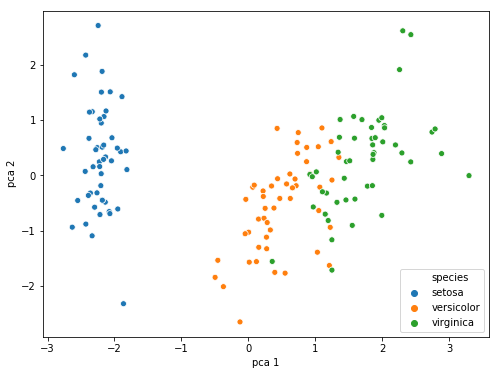

In [27]:
import seaborn as sns
plt.figure(figsize=(8, 6), facecolor='w')

#pca['species'] = df['species']

sns.scatterplot(x= pca['pca 1'], y= pca['pca 2'], hue=dfy['species']);


# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)